In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
parks = pd.read_csv("Parks.csv")
parks.head()

,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.408118,-80.028197
1,1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440507,-79.984018
2,1544096765,Alcoa Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447481,-80.001017
3,1212681573,Allegheny Commons,Park,Parks - Northern,NaN,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.453126,-80.009158
4,954863286,Allegheny Landing Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447184,-80.002907


In [23]:
neighborhoods = parks["neighborhood"].unique()
print(neighborhoods)
print("There are " + str(len(neighborhoods)) + " neighborhoods listed in this dataset.")

['Beechview' 'Crawford-Roberts' 'North Shore' 'Allegheny Center'
 'Central Business District' 'Central Northside' 'East Liberty'
 'Bedford Dwellings' 'South Side Slopes' 'South Side Flats'
 'Lower Lawrenceville' 'Banksville' 'South Oakland' 'Homewood North'
 'Hazelwood' 'Bon Air' 'Central Oakland' 'Brighton Heights' 'Brookline'
 'Spring Garden' 'Lincoln-Lemington-Belmar' 'Windgap' 'Troy Hill'
 'Westwood' 'Perry South' 'Homewood West' 'Squirrel Hill South'
 'Strip District' 'Arlington' 'Stanton Heights' 'Crafton Heights'
 'Upper Lawrenceville' 'East Carnegie' 'East Hills' 'Point Breeze'
 'Allentown' 'Duquesne Heights' 'Mount Washington' 'Esplen' 'Fairywood'
 'Fineview' 'Garfield' 'Greenfield' 'Larimer' 'Bloomfield' 'Perry North'
 'North Oakland' 'Hays' 'Elliott' 'Highland Park' 'Homewood South'
 'Morningside' 'Terrace Village' 'Spring Hill-City View' 'Carrick'
 'Central Lawrenceville' 'Lincoln Place' 'Manchester' 'Marshall-Shadeland'
 'Sheraden' 'Beltzhoover' 'Point Breeze North' 'Oakwo

In [36]:
nbhdCount = {}
for index, nbhd in parks.iterrows(): # For each neighborhood in the parks dataset
    nbhd_name = nbhd['neighborhood'] # Store the current neighborhood's name
    if nbhd_name in nbhdCount: # If the neighborhood is already in the dictionary:
        nbhdCount[nbhd_name] = nbhdCount[nbhd_name] + 1 # Add the neighborhood to running total in the dictionary
    else: # If the neighborhood is not in the dictionary
        nbhdCount[nbhd_name] = 1 # Create a new spot for the neighborhood in the dictionary
print(nbhdCount)

{'Beechview': 8, 'Crawford-Roberts': 3, 'North Shore': 3, 'Allegheny Center': 2, 'Central Business District': 10, 'Central Northside': 3, 'East Liberty': 12, 'Bedford Dwellings': 1, 'South Side Slopes': 7, 'South Side Flats': 6, 'Lower Lawrenceville': 3, 'Banksville': 2, 'South Oakland': 5, 'Homewood North': 2, 'Hazelwood': 6, 'Bon Air': 1, 'Central Oakland': 4, 'Brighton Heights': 4, 'Brookline': 3, 'Spring Garden': 2, 'Lincoln-Lemington-Belmar': 3, 'Windgap': 1, 'Troy Hill': 5, 'Westwood': 3, 'Perry South': 2, 'Homewood West': 1, 'Squirrel Hill South': 6, 'Strip District': 2, 'Arlington': 1, 'Stanton Heights': 1, 'Crafton Heights': 2, 'Upper Lawrenceville': 3, 'East Carnegie': 1, 'East Hills': 1, 'Point Breeze': 7, 'Allentown': 2, 'Duquesne Heights': 2, 'Mount Washington': 6, 'Esplen': 1, 'Fairywood': 1, 'Fineview': 2, 'Garfield': 3, 'Greenfield': 3, 'Larimer': 3, 'Bloomfield': 3, 'Perry North': 2, 'North Oakland': 1, 'Hays': 1, 'Elliott': 4, 'Highland Park': 2, 'Homewood South': 1, 

In [88]:
nbhdFrame = pd.DataFrame([nbhdCount])
nbhdFrame = nbhdFrame.transpose()
nbhdFrame.columns = ['Parks']
nbhdFrame

,Parks
Beechview,8
Crawford-Roberts,3
North Shore,3
Allegheny Center,2
Central Business District,10
...,...
Swisshelm Park,3
Bluff,1
Middle Hill,1
West End,2


In [89]:
nbhdFrame = nbhdFrame.sort_values(by = "Parks", ascending = False)
nbhdFrame

,Parks
East Liberty,12
Central Business District,10
Beechview,8
South Side Slopes,7
Point Breeze,7
...,...
Hays,1
Arlington,1
Stanton Heights,1
Morningside,1


Text(0.5, 1.0, 'Pittsburgh Neighborhood Parks')

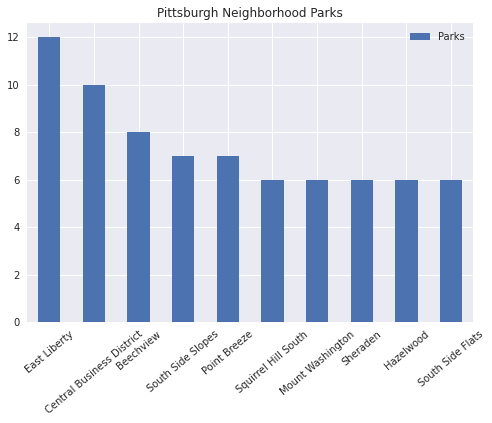

In [92]:
plt.style.use('seaborn')
nbhdFrame.head(10).plot.bar(rot=40)
plt.title("Pittsburgh Neighborhood Parks")